In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pylab
import pandas as pd

In [26]:
train_loss = pd.read_excel('results.xlsx', sheet_name='train_loss')
test_natural_acc = pd.read_excel('results.xlsx', sheet_name='test_natural_acc')
test_robust_acc = pd.read_excel('results.xlsx', sheet_name='test_robust_acc')
train_natural_acc = pd.read_excel('results.xlsx', sheet_name='train_natural_acc')
target_class_acc = pd.read_excel('results.xlsx', sheet_name='target_class_acc')

In [22]:
train_loss.head()

,Epoch,AT,LL,MC,RAND,EMA,1plus
0,1.0,2.279470,2.060629,1.987162,1.951319,1.112856,2.060449
1,2.0,2.037686,1.764756,1.573550,1.617043,0.010088,1.983397
2,3.0,1.955074,1.654670,1.387101,1.474476,0.002982,1.945711
3,4.0,1.892648,1.564244,1.244350,1.345832,0.001244,1.952037
4,5.0,1.844873,1.491710,1.179621,1.270655,0.000541,1.988458


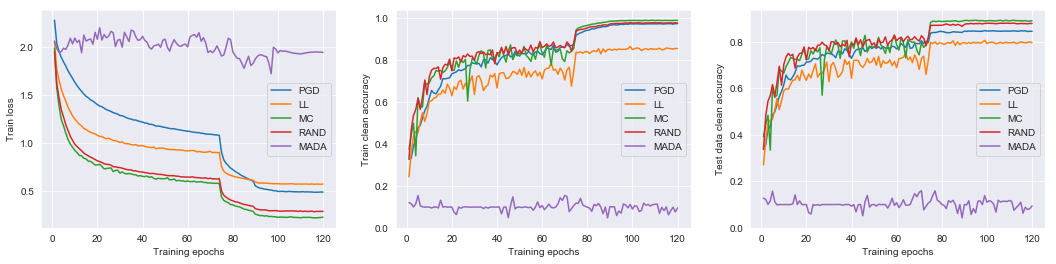

In [43]:
plt.figure(figsize=(18,4))
sns.set_style("darkgrid")
# plot 1
plt.subplot(1, 3, 1)
new_train_loss = train_loss.drop('EMA', axis=1)
sns.lineplot(data=pd.melt(new_train_loss, ['Epoch']), x='Epoch', y='value', hue='variable')
ax = plt.gca()
ax.legend(['PGD', 'LL', 'MC', 'RAND', 'MADA'], loc='center right')
ax.set_xlabel('Training epochs')
ax.set_ylabel('Train loss')

# plot 2
plt.subplot(1, 3, 2)
new_train_natural_acc =train_natural_acc.drop('EMA', axis=1)
sns.lineplot(data=pd.melt(new_train_natural_acc, ['Epoch']), x='Epoch', y='value', hue='variable')
ax = plt.gca()
ax.legend(['PGD', 'LL', 'MC', 'RAND', 'MADA'], loc='center right')
ax.set_xlabel('Training epochs')
ax.set_ylabel('Train clean accuracy')


# plot 3
plt.subplot(1, 3, 3)
new_test_natural_acc =test_natural_acc.drop('EMA', axis=1)
sns.lineplot(data=pd.melt(new_test_natural_acc, ['Epoch']), x='Epoch', y='value', hue='variable')
ax = plt.gca()
ax.legend(['PGD', 'LL', 'MC', 'RAND', 'MADA'], loc='center right')
ax.set_xlabel('Training epochs')
ax.set_ylabel('Test data clean accuracy')

plt.savefig('compare-with-benign-adversary.pdf',  bbox_inches='tight',  pad_inches = 0)

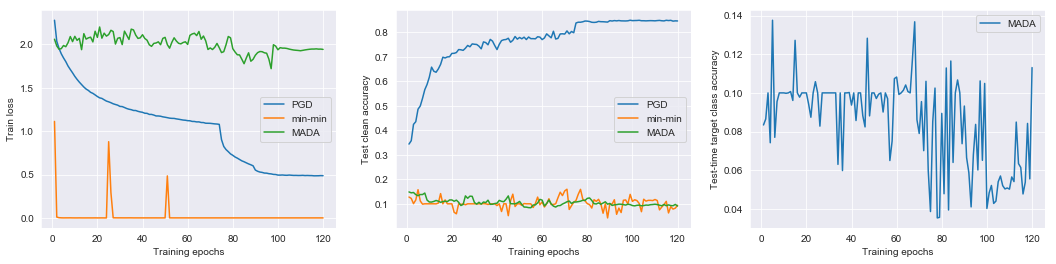

In [45]:
plt.figure(figsize=(18,4))
sns.set_style("darkgrid")
# plot 1
plt.subplot(1, 3, 1)
new_train_loss = train_loss.drop(['LL', 'MC', 'RAND'], axis=1)
sns.lineplot(data=pd.melt(new_train_loss, ['Epoch']), x='Epoch', y='value', hue='variable')
ax = plt.gca()
ax.legend(['PGD', 'min-min', 'MADA'], loc='center right')
ax.set_xlabel('Training epochs')
ax.set_ylabel('Train loss')

# plot 2
plt.subplot(1, 3, 2)
new_test_natural_acc =test_natural_acc.drop(['LL', 'MC', 'RAND'], axis=1)
sns.lineplot(data=pd.melt(new_test_natural_acc, ['Epoch']), x='Epoch', y='value', hue='variable')
ax = plt.gca()
ax.legend(['PGD', 'min-min', 'MADA'], loc='center right')
ax.set_xlabel('Training epochs')
ax.set_ylabel('Test clean accuracy')

# plot 2
plt.subplot(1, 3, 3)
# test_robust_acc =test_robust_acc.drop(['LL', 'MC', 'RAND'], axis=1)
sns.lineplot(data=pd.melt(target_class_acc, ['Epoch']), x='Epoch', y='value', hue='variable')
ax = plt.gca()
ax.legend(['MADA'], loc='upper right')
ax.set_xlabel('Training epochs')
ax.set_ylabel('Test-time target class accuracy')


plt.savefig('compare-with-min-min.pdf',  bbox_inches='tight',  pad_inches = 0)

In [ ]:
plt.figure(figsize=(18,4))
sns.set_style("darkgrid")
# plot 1
plt.subplot(1, 3, 1)
data = pd.DataFrame({
    'DGC-SA':  [80.06, 81.5, 82.3, 82.8, 83.0, 83.0, 83.0, 83.0],
    'DGC-sym': [80.79, 81.7, 81.7, 82.2, 82.4, 82.5, 82.5, 82.5]
})
indices = np.log([2, 5, 10, 20, 50, 100, 300, 1000])
data = data.set_index(indices)
# fig, ax = plt.subplots()
# plt.plot(data)
plt.plot(data['DGC-SA'], linestyle='-')
plt.plot(data['DGC-sym'], linestyle='-.')
ax = plt.gca()
ax.legend(['With self-loop', 'Without self-loop'], loc='lower right')
# Ensure limits are [0,1] and remove ticks
# ax = plt.axes()
ax.set_xlim(np.log([2,1000]))
ax.set_xticks(indices)
ax.set_xticklabels(['2','5', '10', '20', '50', '100', '300', '1000'])
# ax.set_xlabel('Relative Training Time')
# ax.set_ylabel('Test Acc (%)')
# # ax.set_xtitle('Relative Training Time')
# # ax.set_xticks(['x'])
ax.set_ylim(80,83.2)
ax.set_yticks([80, 80.5, 81.0, 81.25, 81.5, 82.0, 82.5, 83.0]) 
ax.set_yticklabels(['30.0', '35.0', '40.0', '. . .', '81.5', '82.0', '82.5', '83.0']) 
ax.set_xlabel('Propagation steps $K$')
ax.set_ylabel('Test Acc (%)')
ax.set_title('Laplacian')



# plot 2
plt.subplot(1, 3, 2)
data = pd.DataFrame({
    'Euler':       [78.0, 80.5, 81.1, 81.6, 81.0, 80.9, 81.0, 81.0],
    'Runge-Kutta': [75.0, 78.7, 81.7, 81.9, 81.1, 81.1, 80.9, 81.0]
})
indices = np.log([1, 2, 4, 5, 10, 20, 50, 100])
data = data.set_index(indices)
# fig, ax = plt.subplots()
plt.plot(data['Euler'], linestyle='-')
plt.plot(data['Runge-Kutta'], linestyle='-.')
# data.plot(style=[':','-'])
# data.plot(color=['orange', 'green'], style=['-.', ':'])

ax = plt.gca()
ax.legend(['Euler', 'Runge-Kutta'], loc='lower right')
# Ensure limits are [0,1] and remove ticks
# ax = plt.axes()
ax.set_xlim(np.log([1,100]))
ax.set_xticks(indices)
ax.set_xticklabels(['1','2', '4', '5', '10', '20', '50', '100'])
# ax.set_xlabel('Relative Training Time')
# ax.set_ylabel('Test Acc (%)')
# # ax.set_xtitle('Relative Training Time')
# # ax.set_xticks(['x'])
ax.set_ylim(75, 82.2)
ax.set_yticks([75.0, 77.25, 79.5, 80.0, 80.5, 81.0, 81.5, 82.0]) 
ax.set_yticklabels(['25.0', '30.0', '35.0', '. . .', '80.5', '81.0', '81.5', '82.0']) 
ax.set_xlabel('Propagation steps $K$')
ax.set_ylabel('Test Acc (%)')
ax.set_title('Numerical Scheme')

# plot 3
plt.subplot(1, 3, 3)
data = pd.DataFrame({
    'DGC':  [75.9, 77.1, 78.4, 79.1, 80.6, 81.6, 82.2,
             82.0, 82.4, 82.2, 82.7, 82.8, 82.1, 81.5,
             80.9, 80.7, 80.9, 80.7, 80.6, 80.5]
})
indices = np.arange(20)
data = data.set_index(indices)
# plt.plot(data['SGC'], linestyle='-.')
plt.plot(data['DGC'], linestyle='-')
ax = plt.gca()
# ax.legend(['SGC', 'DGC'], loc='upper right')
ax.set_xlim([0,0.9])
ax.set_xticks(np.arange(0,20,2))
ax.set_xticklabels(np.arange(0,20,2) * 0.5)
ax.set_ylim(75, 82.9)
ax.set_yticks([76.0, 77, 78, 79, 80.0,  81.0, 82.0, 82.5]) 
ax.set_yticklabels(['60.0', '70.0', '75.0', '. . .', '80.0', '81.0', '82.0', '82.5']) 
ax.set_xlabel('Terminal time $T$')
ax.set_ylabel('Test Acc (%)')
ax.set_title('Terminal time')

plt.savefig('model-analysis.pdf',  bbox_inches='tight',  pad_inches = 0)